In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
from selenium import webdriver 
import time 
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.common.by import By
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv("D:/New folder/Semester 3/ADY301m/file csv/ho_chi_minh_real_estate.csv")
df.head()

,Price (VND),Area,Type,Year
0,4647918900,District 1,Townhouse,2015
1,1915117647,District 7,Townhouse,2016
2,5064016565,District 2,Villa,2018
3,5680842555,Tan Binh,Townhouse,2000
4,5233226089,District 5,Townhouse,1996


In [6]:
st=df["Price (VND)"].describe()
print(f"Thống kê mô tả:")
st

Thống kê mô tả:


count    1.000000e+02
mean     5.621449e+09
std      2.827186e+09
min      5.415185e+08
25%      3.246898e+09
50%      5.918289e+09
75%      8.181221e+09
max      9.979485e+09
Name: Price (VND), dtype: float64

In [7]:
# Tính hệ số biến thiên và in kết quả
print(f"Coefficient of Variation : {df['Price (VND)'].std() / df['Price (VND)'].mean()}")

# Tính Mean Absolute Deviation (MAD) và in kết quả
print(f"Mean Absolute Deviation (MAD): {df['Price (VND)'].abs().mean()}")

# Tính IQR, giới hạn trên và dưới
IQR = df['Price (VND)'].quantile(0.75) - df['Price (VND)'].quantile(0.25)
low = df['Price (VND)'].quantile(0.25) - 1.5 * IQR
up = df['Price (VND)'].quantile(0.75) + 1.5 * IQR

# In ra các giá trị ngoại lai (outliers)
outliers = df["Price (VND)"][(df['Price (VND)'] < low) | (df['Price (VND)'] > up)]
print(f"Outliers: \n{outliers}")

Coefficient of Variation : 0.5029284216915032
Mean Absolute Deviation (MAD): 5621448939.01
Outliers: 
Series([], Name: Price (VND), dtype: int64)


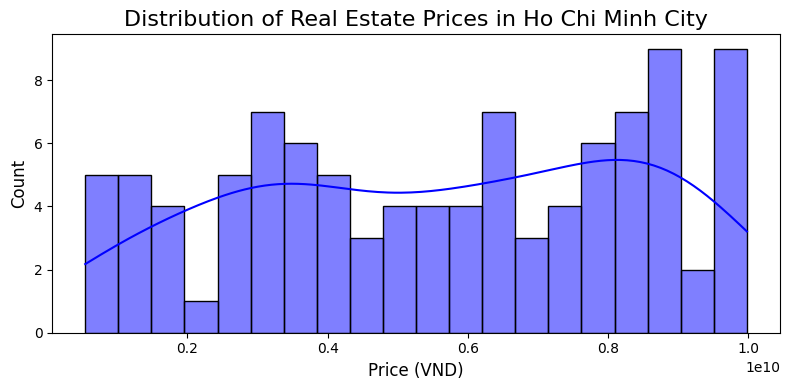

In [9]:
#Visualization
#Price distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['Price (VND)'], bins=20, kde=True, color='blue')
plt.title('Distribution of Real Estate Prices in Ho Chi Minh City', fontsize=16)
plt.xlabel('Price (VND)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

C:\Users\HOAIPHUC\AppData\Local\Temp\ipykernel_8936\1704178654.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Type', palette='Set2')


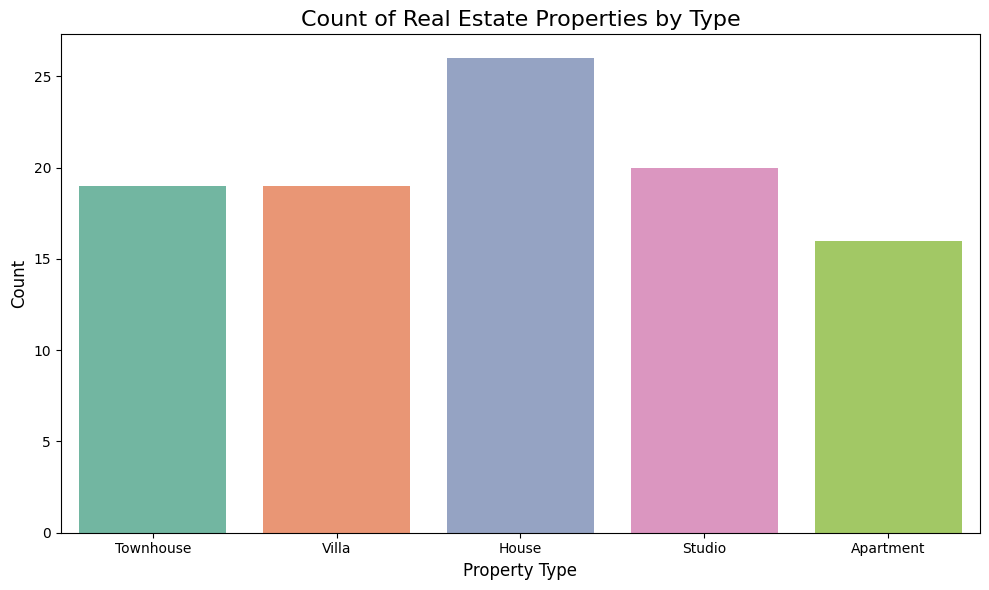

In [10]:
# Plot 2: Count of properties by type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type', palette='Set2')
plt.title('Count of Real Estate Properties by Type', fontsize=16)
plt.xlabel('Property Type', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

C:\Users\HOAIPHUC\AppData\Local\Temp\ipykernel_8936\2955915425.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Area', y='Price (VND)', data=avg_price_by_district, palette='coolwarm')


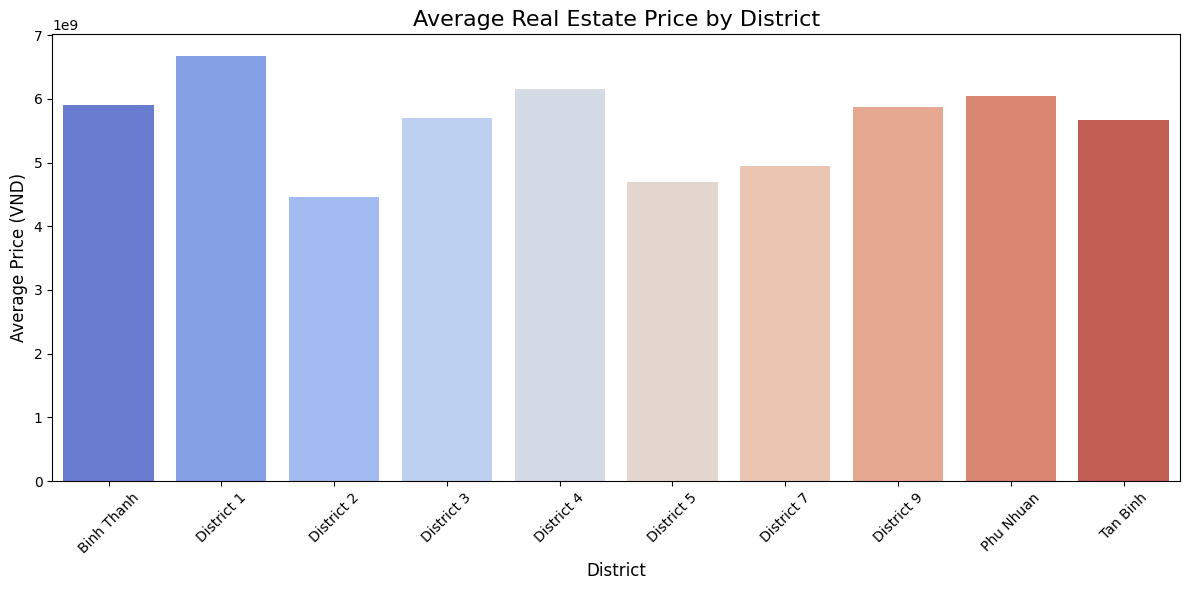

In [11]:
plt.figure(figsize=(12, 6))
avg_price_by_district = df.groupby('Area')['Price (VND)'].mean().reset_index()
sns.barplot(x='Area', y='Price (VND)', data=avg_price_by_district, palette='coolwarm')
plt.title('Average Real Estate Price by District', fontsize=16)
plt.xticks(rotation=45)
plt.xlabel('District', fontsize=12)
plt.ylabel('Average Price (VND)', fontsize=12)
plt.tight_layout()
